In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_enc=LabelEncoder()
from sklearn.metrics import silhouette_score

In [92]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [93]:
data.dropna(inplace=True)

In [94]:
data.duplicated().sum()

0

In [95]:
data=data.drop('Surname',axis=1)

In [96]:
data['Geography']=label_enc.fit_transform(data[['Geography']])

c:\Users\mvale\Documents\_env1\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
data.describe()

,RowNumber,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.746300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.827529,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,2.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [98]:


label_encoded_data = data
label_encoded_data['Gender'] = data['Gender'].map({'Male':0,'Female':1})
label_encoded_data.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [99]:
onehot_encoded_data = data
onehot_encoded_data = pd.get_dummies(data, columns = ['Gender'])
onehot_encoded_data.head()

,RowNumber,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_0,Gender_1
0,1,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,False,True
1,2,15647311,608,2,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,False,True
3,4,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,False,True
4,5,15737888,850,2,43,2,125510.82,1,1,1,79084.10,0,False,True


In [100]:
data.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [101]:
data.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [102]:
# Clustering K-Means

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix




<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

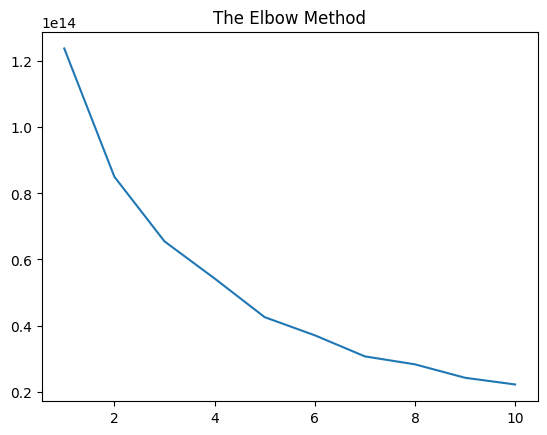

In [103]:
# ElbowMethod and Silhouette method
# Deciding the number of clusters k, use elbow method, within-clusters sume of squares - distances btw data points and their centroids

wcss = []
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(onehot_encoded_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel



In [107]:
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(onehot_encoded_data)

    silhouette_avg = silhouette_score(onehot_encoded_data,kmeans.labels_)

    silhouette_scores.append(silhouette_avg)

plt.plot(range(2,11),silhouette_scores,marker='o')
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.show()

KeyboardInterrupt: 

In [108]:
kmeans=KMeans(n_clusters=6,random_state=42)
kmeans.fit(onehot_encoded_data)

KMeans(n_clusters=6, random_state=42)

In [109]:
onehot_encoded_data['Cluster'] = kmeans.labels_
onehot_encoded_data.head()

,RowNumber,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_0,Gender_1,Cluster
0,1,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,False,True,5
1,2,15647311,608,2,41,1,83807.86,1,0,1,112542.58,0,False,True,2
2,3,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,False,True,2
3,4,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,False,True,4
4,5,15737888,850,2,43,2,125510.82,1,1,1,79084.10,0,False,True,3


In [110]:
cluster_groups = onehot_encoded_data.groupby('Cluster')
cluster_groups.head()

,RowNumber,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_0,Gender_1,Cluster
0,1,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,False,True,5
1,2,15647311,608,2,41,1,83807.86,1,0,1,112542.58,0,False,True,2
2,3,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,False,True,2
3,4,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,False,True,4
4,5,15737888,850,2,43,2,125510.82,1,1,1,79084.10,0,False,True,3
5,6,15574012,645,2,44,8,113755.78,2,1,0,149756.71,1,True,False,2
6,7,15592531,822,0,50,7,0.00,2,1,1,10062.80,0,True,False,1
7,8,15656148,376,1,29,4,115046.74,4,1,0,119346.88,1,False,True,2
8,9,15792365,501,0,44,4,142051.07,2,0,1,74940.50,0,True,False,3
9,10,15592389,684,0,27,2,134603.88,1,1,1,71725.73,0,True,False,2
